In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

data = pd.read_csv("Cancer_Data.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Accuracy: 0.9824561403508771
Minimum error at epoch: 705, Error value: 0.07974825551127553
Final weights of each attribute:
Layer 1 weights shape: (30, 1)
Layer 2 weights shape: (1, 1)


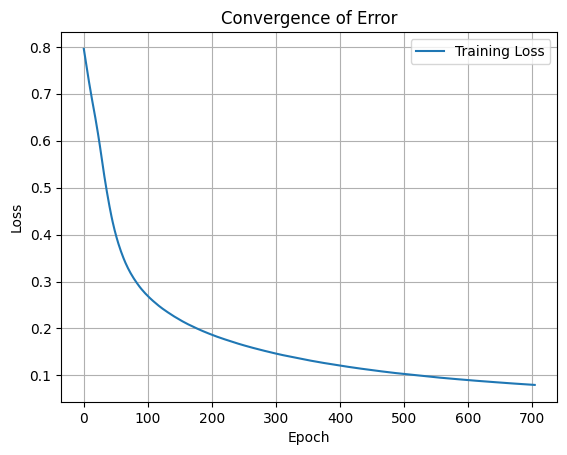

In [ ]:

# Step 2: Data preprocessing
data = data.drop(columns=['Unnamed: 32', 'id'])

# Encode the 'diagnosis' column (M = 1, B = 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Fill missing values (though there are no missing values in this dataset)
for column in X.columns:
    if X[column].dtype == 'object':
        X[column].fillna(X[column].mode()[0], inplace=True)
    else:
        X[column].fillna(X[column].mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train_ratio = 0.8
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-train_ratio, random_state=23, shuffle=True)

mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter=1000, random_state=23)
mlp.fit(X_train, y_train)

# Make predictions and calculate accuracy
pred = mlp.predict(X_test)
accuracy = np.mean(pred == y_test)
print("Accuracy:", accuracy)

#Plot loss history and identify minimum error epoch
loss_history = mlp.loss_curve_
min_error_epoch = np.argmin(loss_history) + 1
min_error_value = min(loss_history)
print(f'Minimum error at epoch: {min_error_epoch}, Error value: {min_error_value}')

#Display final weights of each layer
weights = mlp.coefs_
print("Final weights of each attribute:")
for i, weight in enumerate(weights):
    print(f"Layer {i+1} weights shape: {weight.shape}")

#Plot the convergence of error
plt.plot(loss_history, label='Training Loss')
plt.title('Convergence of Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()
